In [202]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import product
from scipy.stats import pearsonr
import os
from scipy.sparse import csgraph
from gloop_net_evolution import MulRunsAvgReturnTimeFitness, MulExpGrowthFromReturnFitness
from gloop_net_sim import create_J_C
import util
import os

In [207]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
all_results = pickle.load(open(f"experiments\\analysis", 'rb'))

all_tests = product(["Symmetry", "2_cycles", "3_cycles", "4_cycles"], ["small",  "large",  "small_to_large",  "large_to_small",  "all", ])
# all_tests = product(["Symmetry", "2_cycles", "3_cycles", "4_cycles"], ["small",  "med",  "large",  "small_to_large",  "large_to_small",  "all", ])
all_tests = ["fitness"] + [f"{a}_{b}" for a, b in all_tests]
def get_all_traj_per_key(key):
    trajs = np.zeros((32, 20))
    trajs[0:8] = [all_results[exp_name][key] for exp_name in all_results if exp_name.endswith("avg_fitness_T_ws=[100]")]
    trajs[8:16] = [all_results[exp_name][key] for exp_name in all_results if exp_name.endswith("avg_fitness_T_ws=[2000]")]
    trajs[16:24] = [all_results[exp_name][key] for exp_name in all_results if exp_name.endswith("exp_growth_fitness_T_ws=[100]")]
    trajs[24:32] = [all_results[exp_name][key] for exp_name in all_results if exp_name.endswith("exp_growth_fitness_T_ws=[2000]")]
    return trajs

C:\Users\Owner\AppData\Local\Temp\ipykernel_20136\2454408831.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Owner\AppData\Local\Temp\ipykernel_20136\2454408831.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Owner\AppData\Local\Temp\ipykernel_20136\2454408831.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Owner\AppData\Local\Temp\ipykernel_20136\2454408831.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Owner\AppData\Local\Temp\ipykernel_20136\2454408831.py:47: UserWarning: Matplotlib is currently using m

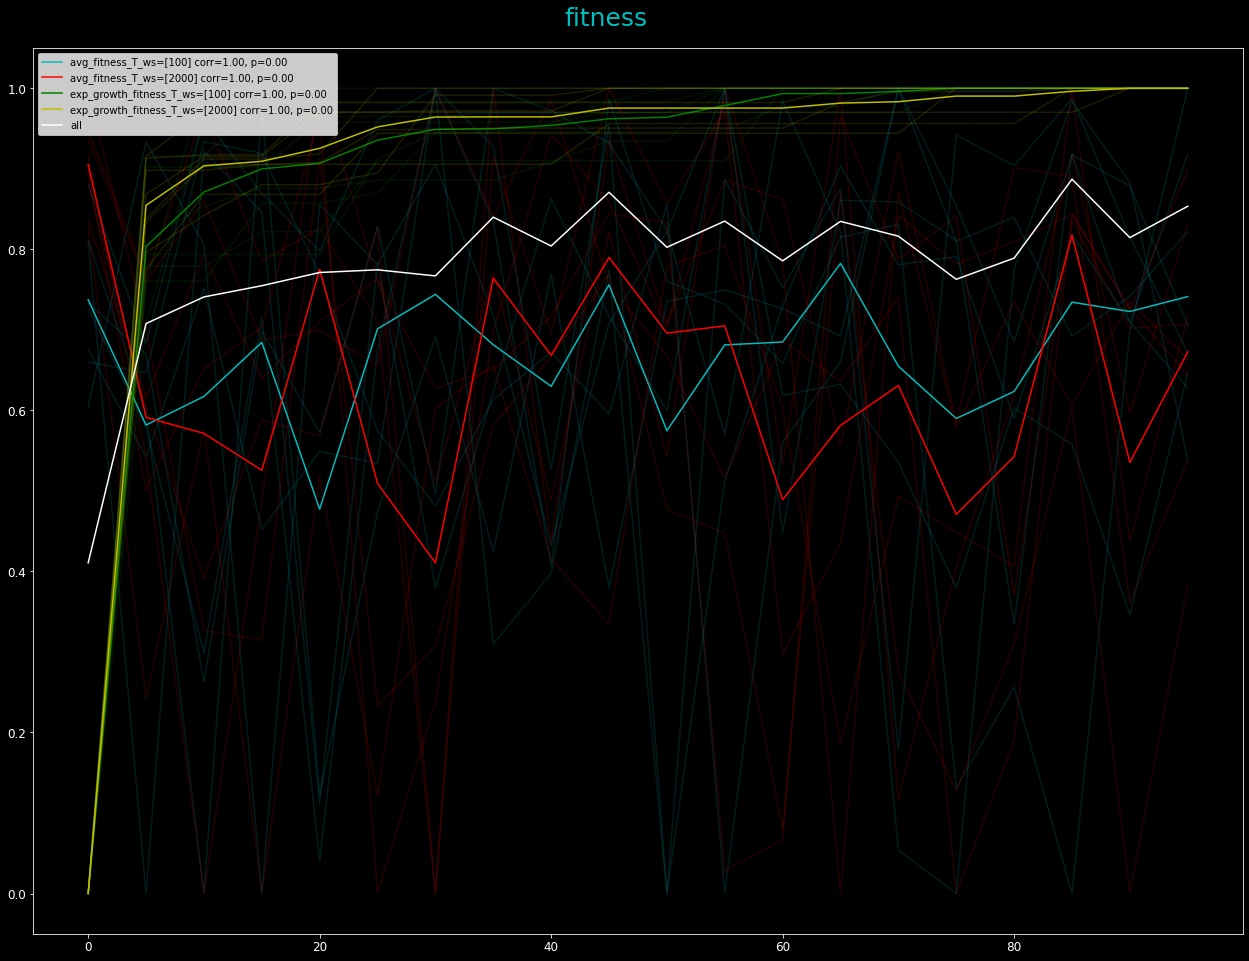

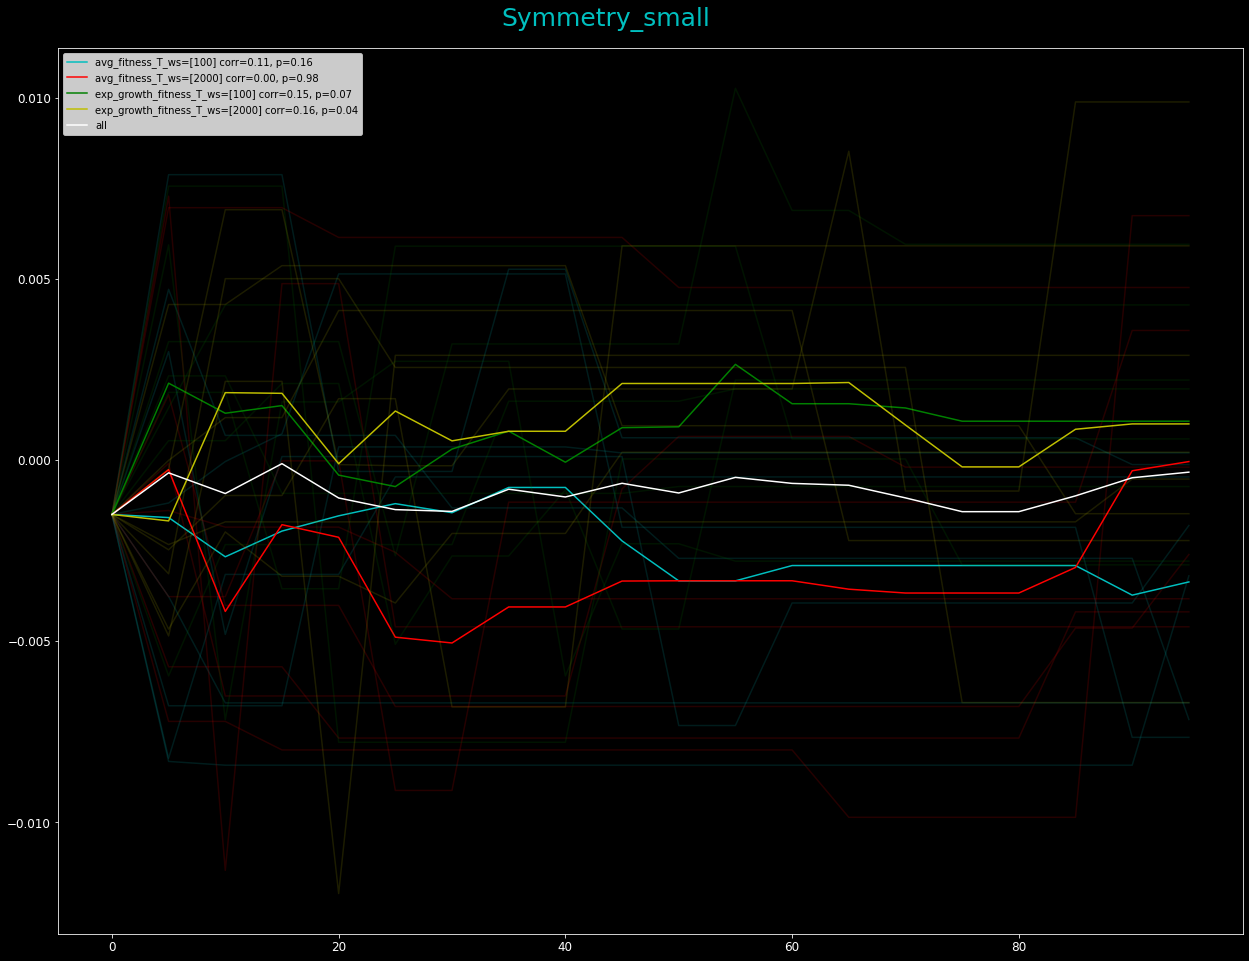

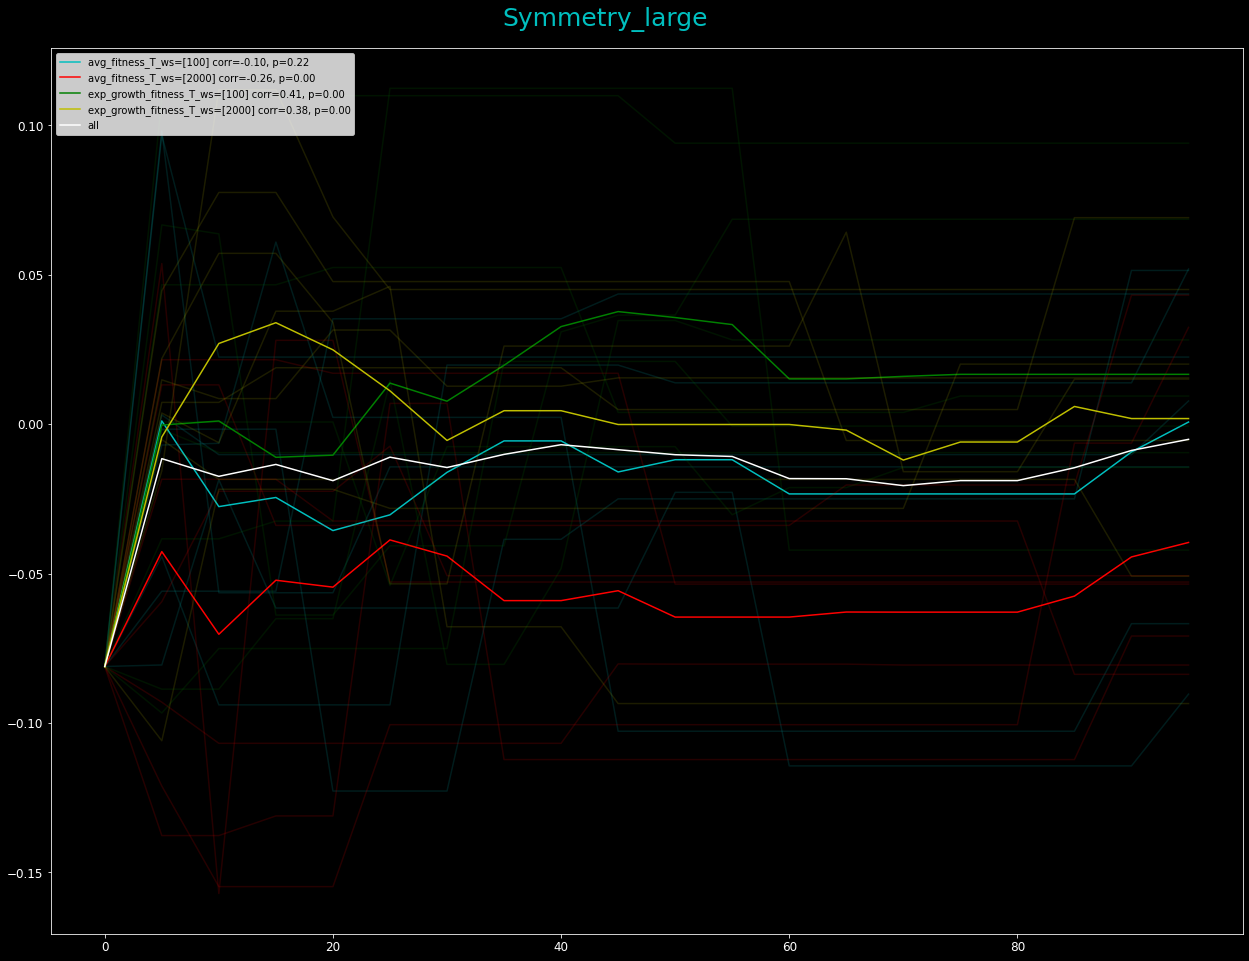

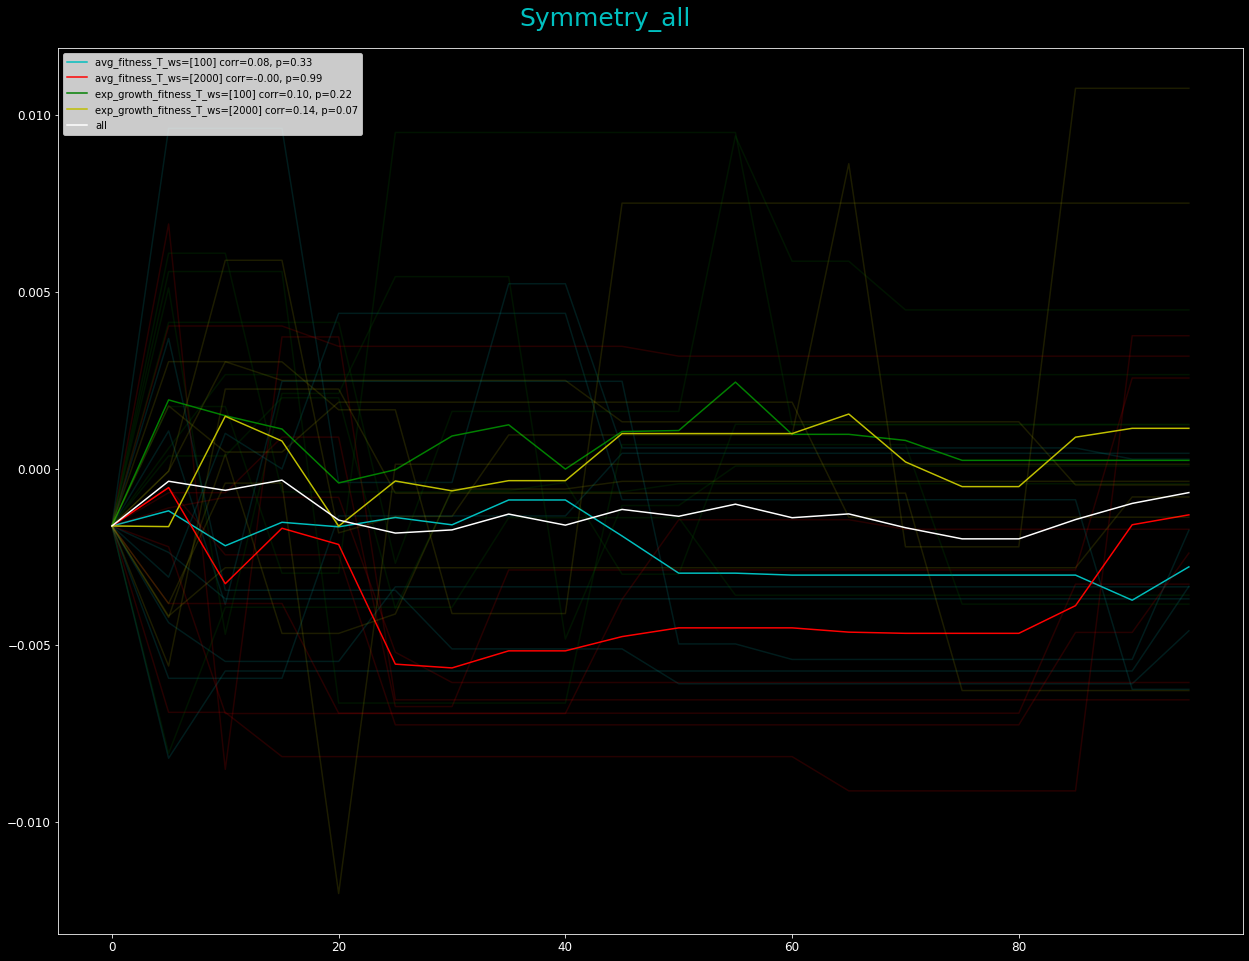

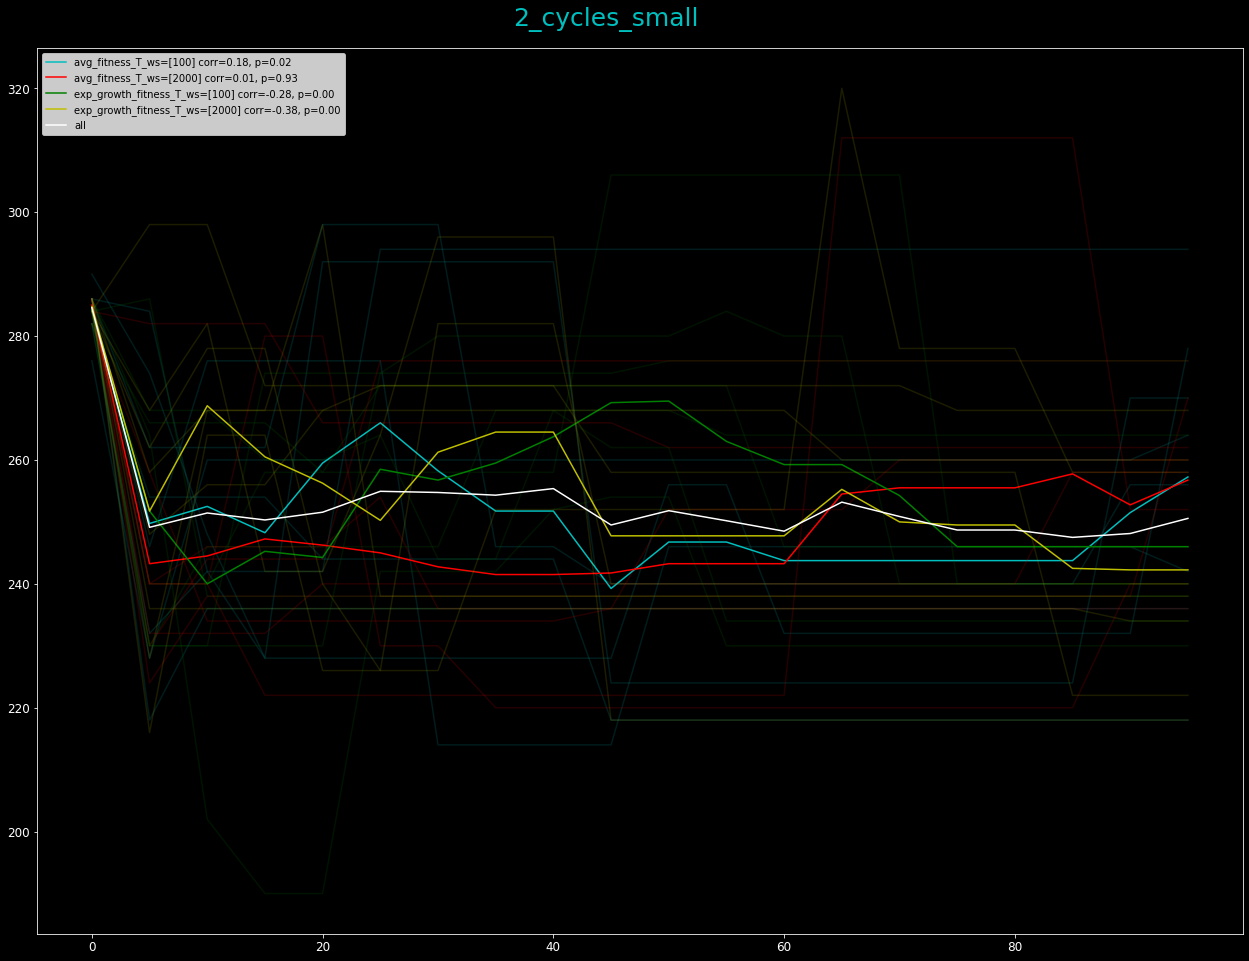

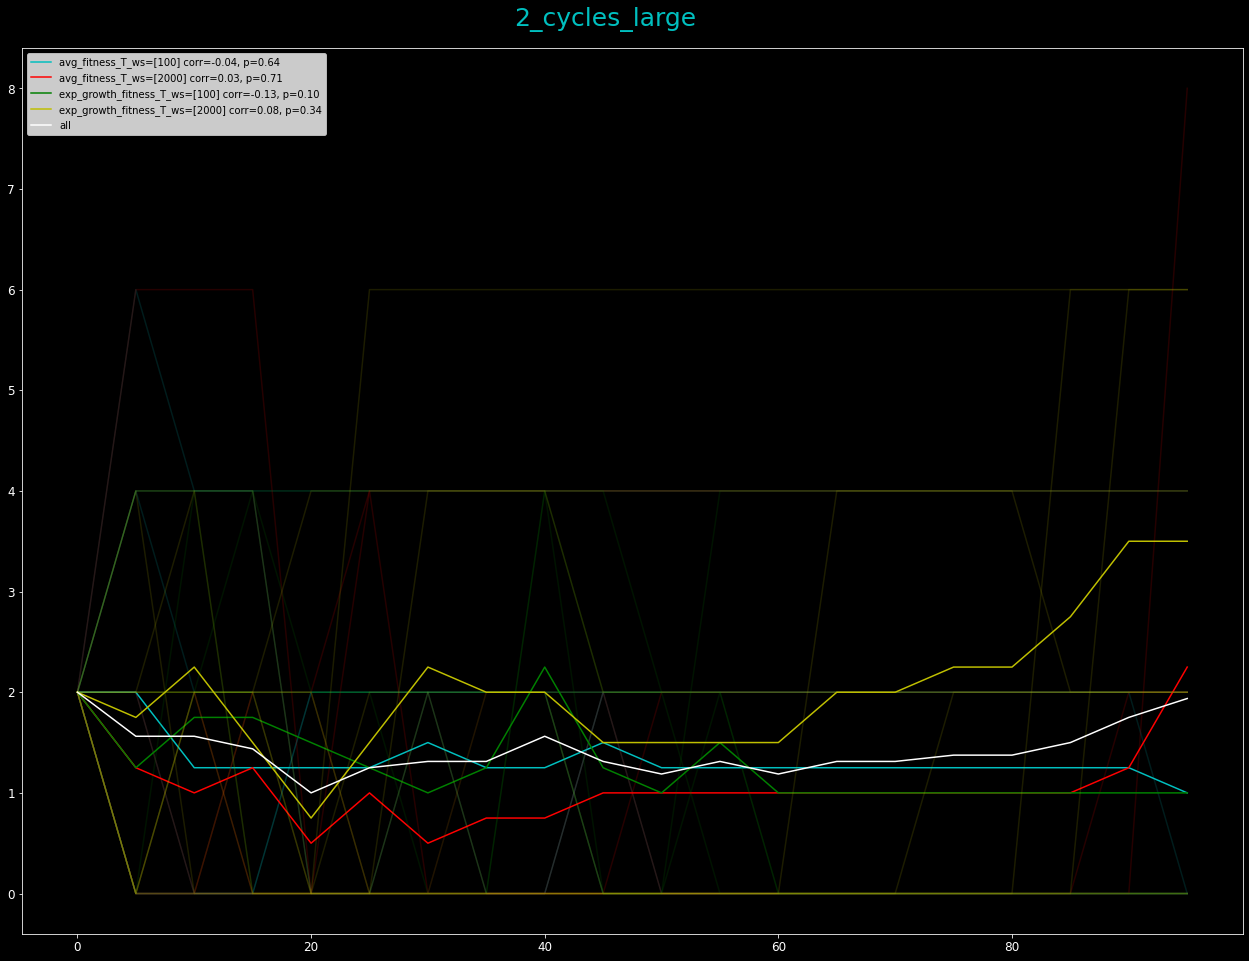

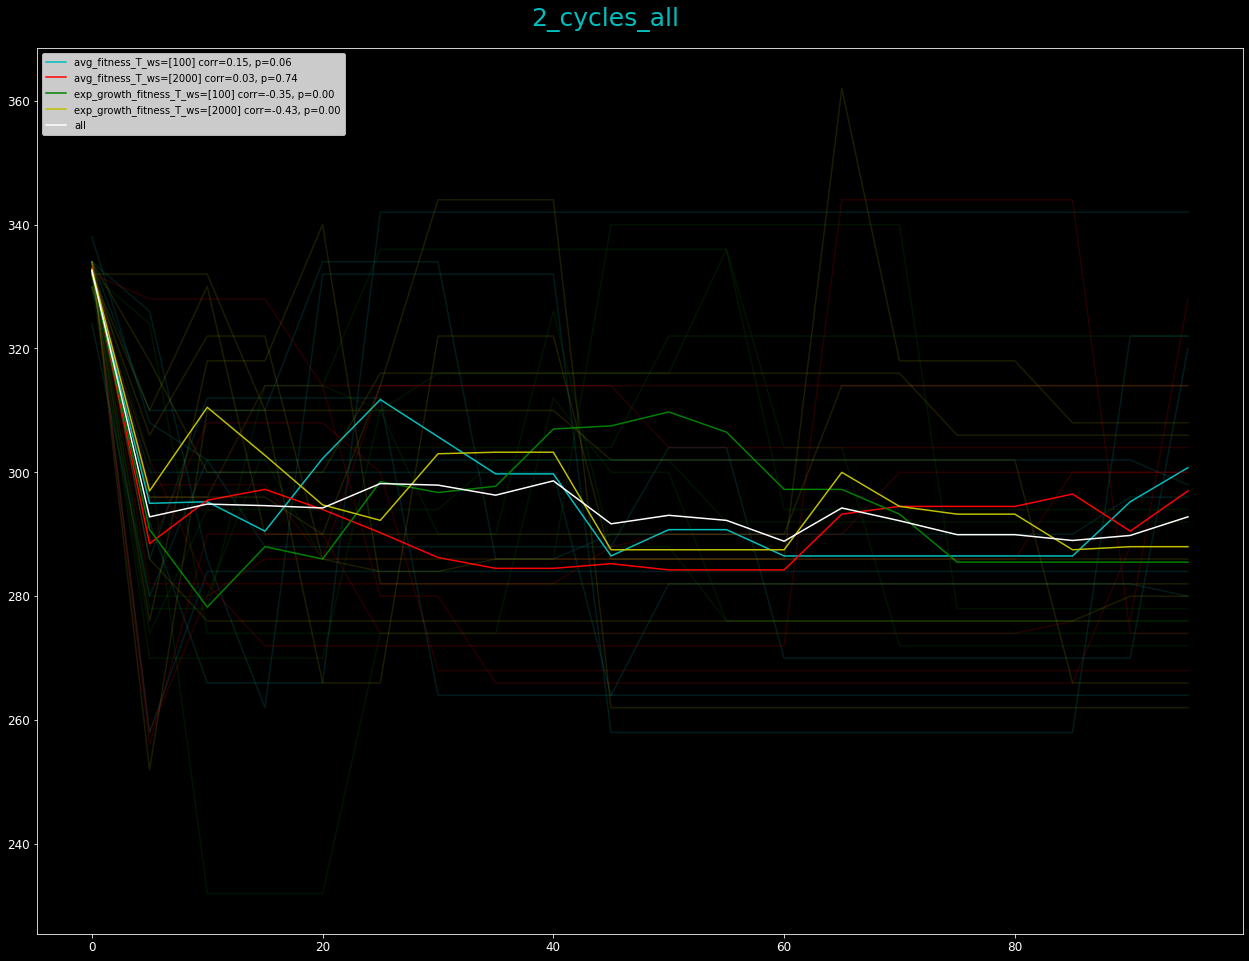

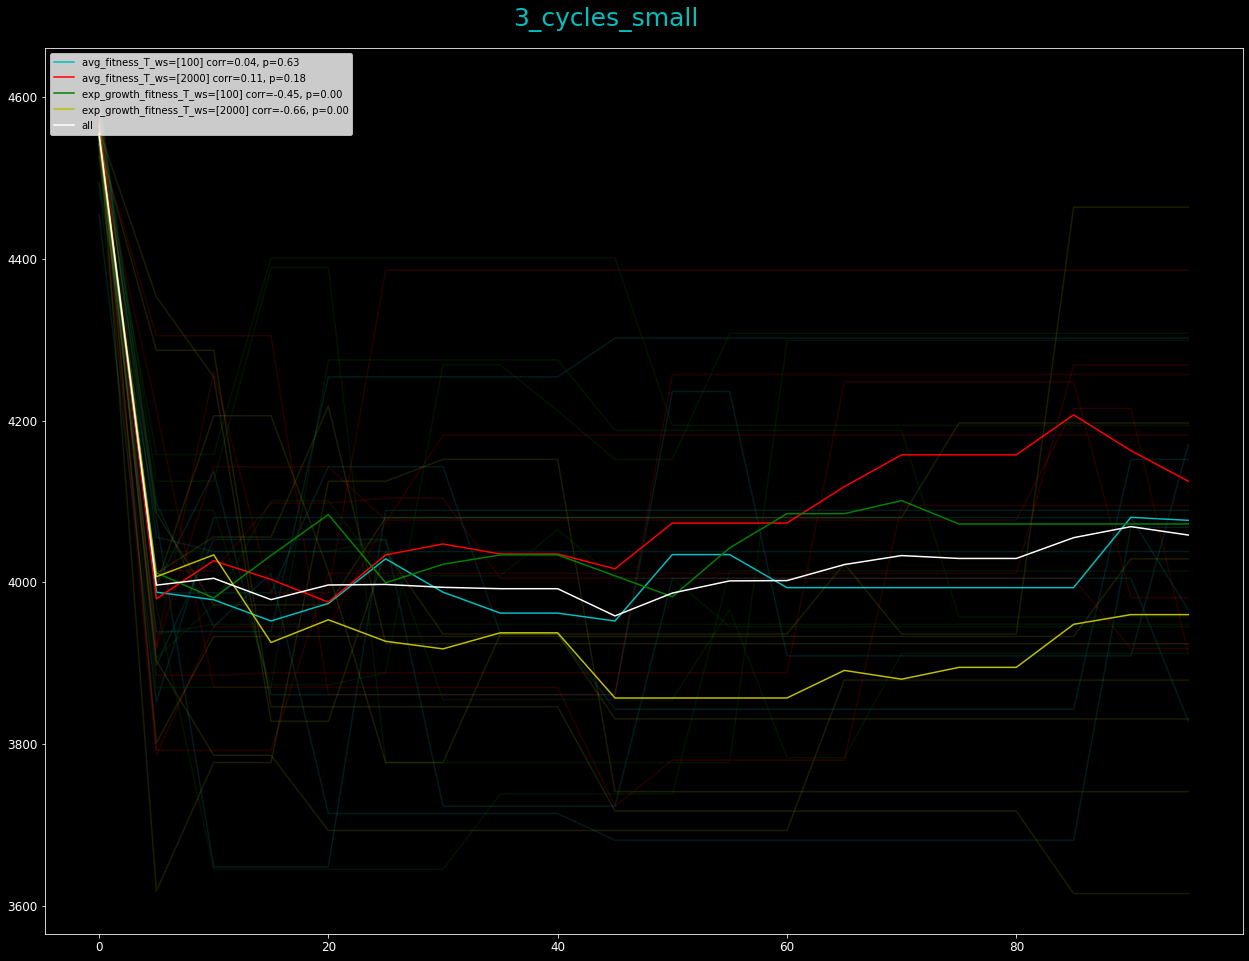

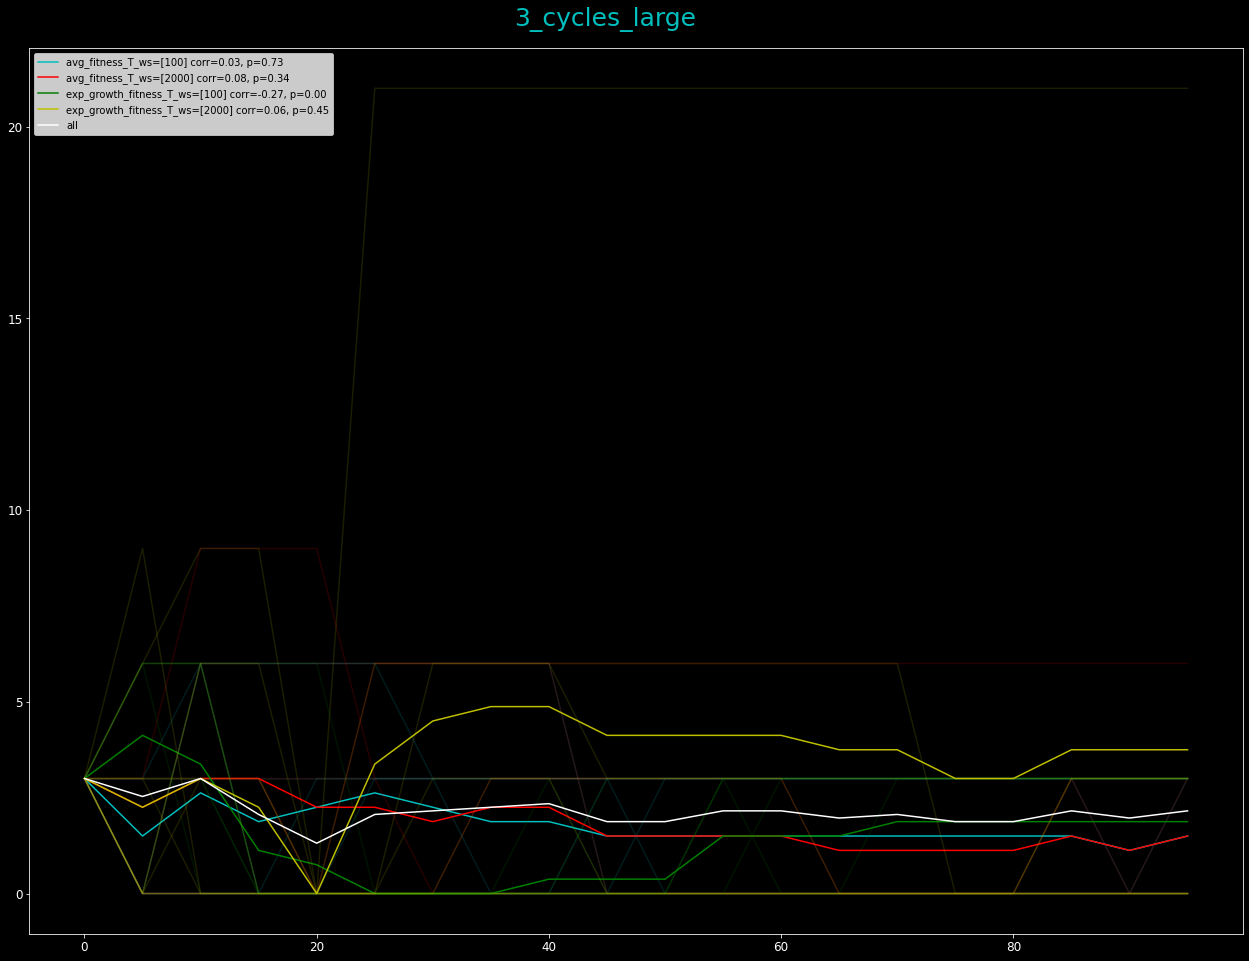

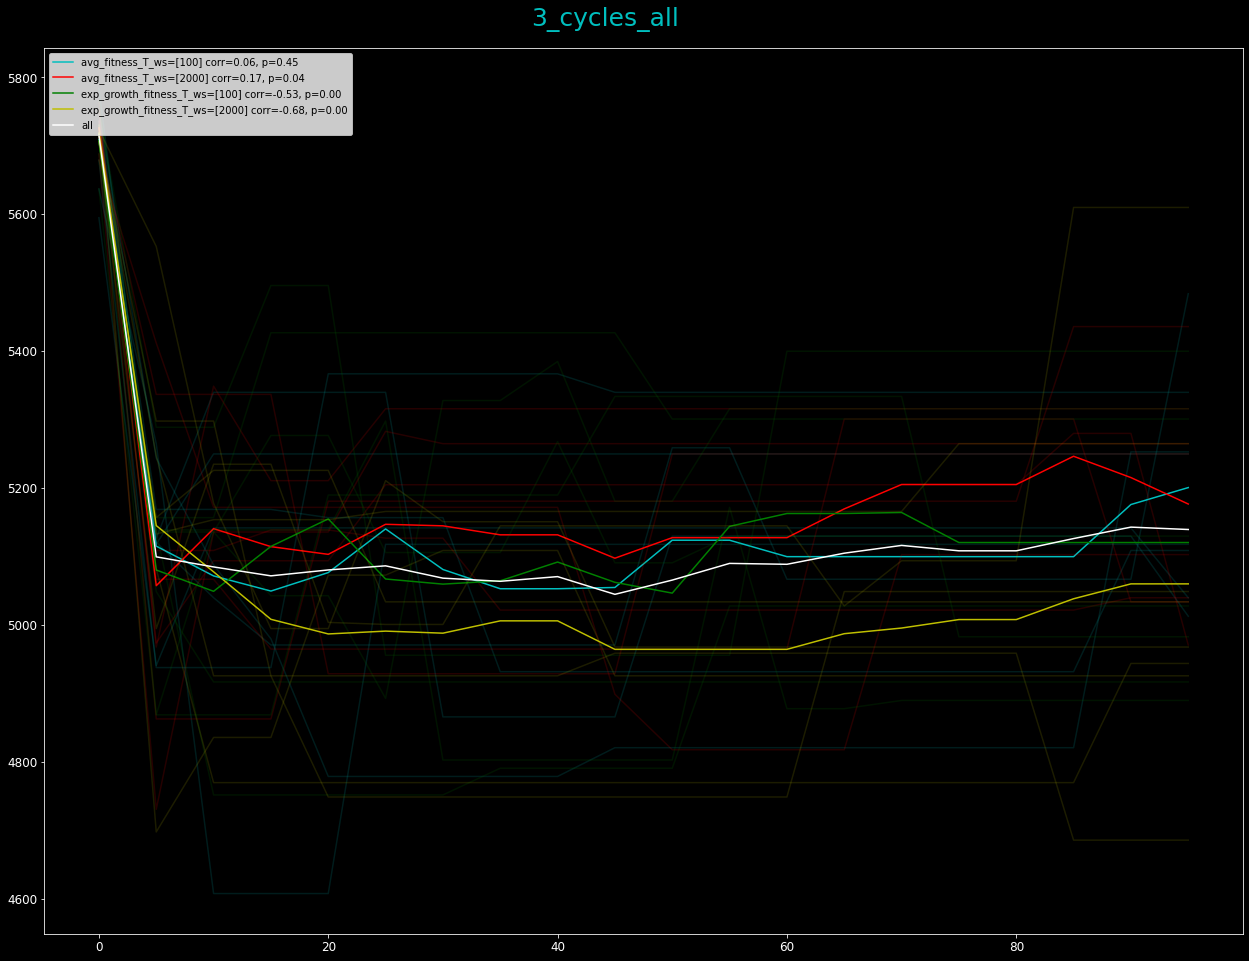

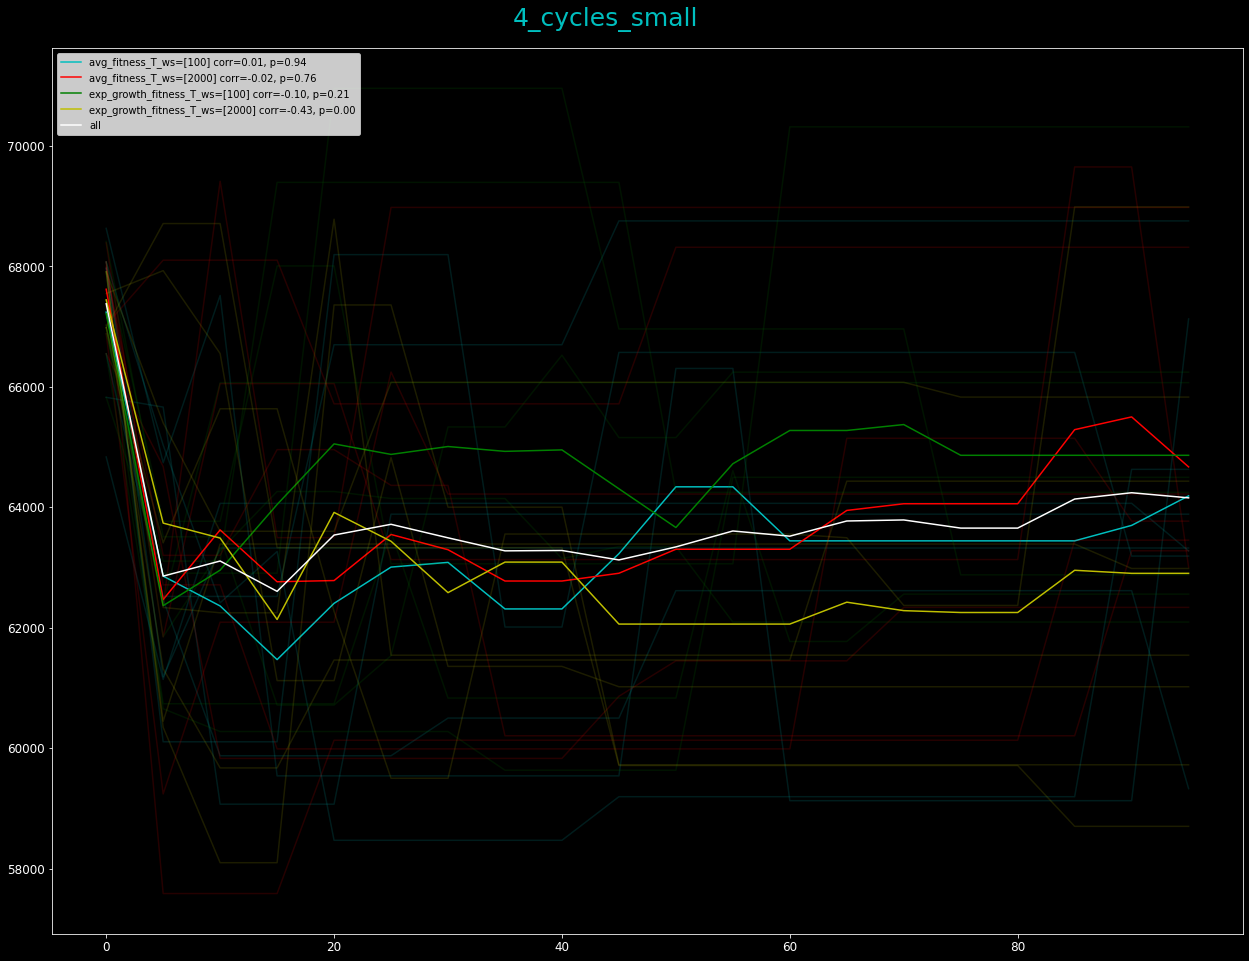

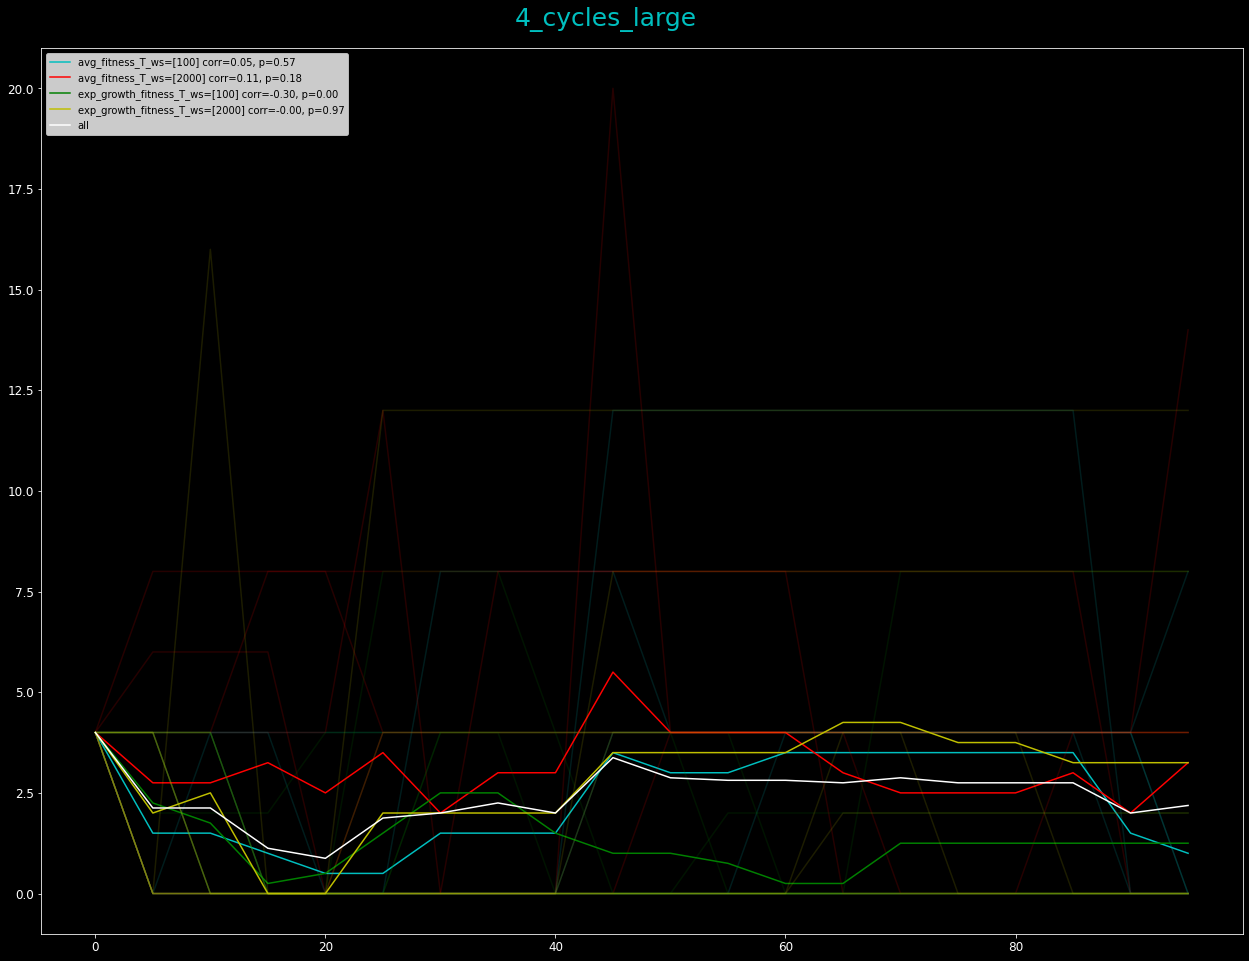

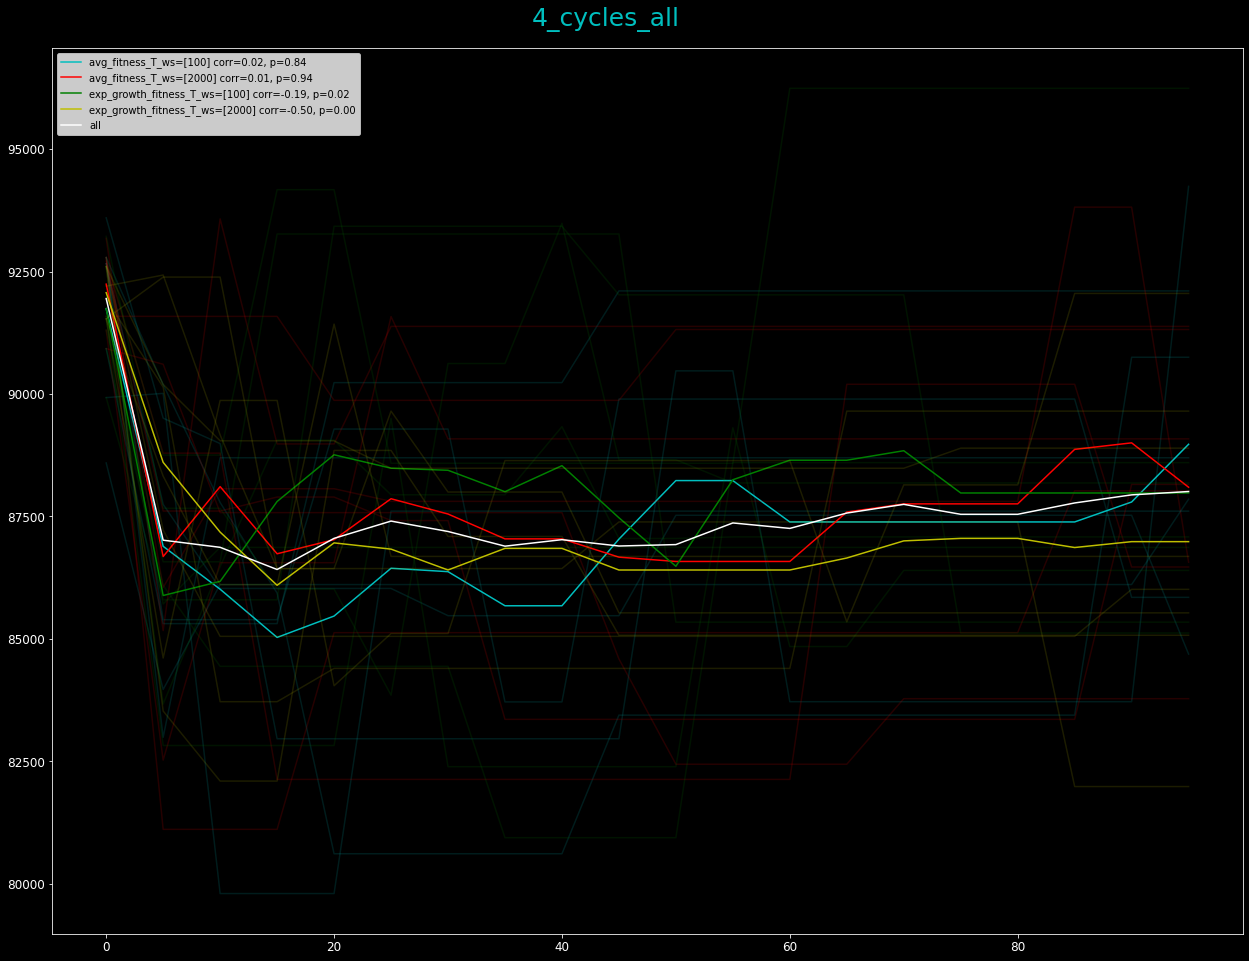

In [107]:
def get_corr_str(x, y):
    corr, p = pearsonr(x.flatten(), y.flatten())
    return f"corr={corr:.2f}, p={p:.2f}"

# with plt.style.context("seaborn-darkgrid"):
plt.rcParams.update({'axes.labelsize': 'large', "xtick.labelsize": 'large',  "ytick.labelsize": 'large'})
fitness = get_all_traj_per_key("fitness")
for key in all_tests:
    if key not in all_results["2022_03_27_21_37_11_gradual_stress_avg_fitness_T_ws=[100]"]: continue

    with plt.style.context("dark_background"):
        fig, ax = plt.subplots(1, 1, figsize=(18, 14))
    # ax.xaxis.label.set_size(16); ax.yaxis.label.set_size(16)
    x_axis = np.arange(0, 100, 5)

    res = get_all_traj_per_key(key)
    corr_str = get_corr_str(res[0:8], fitness[0:8])
    ax.plot(x_axis, res[0:8].T, c="c", alpha=0.15)
    ax.plot(x_axis, np.mean(res[0:8], axis=0), c="c", alpha=1, label="avg_fitness_T_ws=[100] " + corr_str)
    # ax_scatter.scatter(res[0:8], fitness[0:8], c="c")

    corr_str = get_corr_str(res[8:16], fitness[8:16])
    ax.plot(x_axis, res[8:16].T, c="r", alpha=0.15)
    ax.plot(x_axis, np.mean(res[8:16], axis=0), c="r", alpha=1, label="avg_fitness_T_ws=[2000] " + corr_str)
    # ax_scatter.scatter(res[8:16], fitness[8:16], c="r")

    corr_str = get_corr_str(res[16:24], fitness[16:24])
    ax.plot(x_axis, res[16:24].T, c="g", alpha=0.15)
    ax.plot(x_axis, np.mean(res[16:24], axis=0), c="g", alpha=1, label="exp_growth_fitness_T_ws=[100] " + corr_str)
    # ax_scatter.scatter(res[16:24], fitness[16:24], c="g")

    corr_str = get_corr_str(res[24:32], fitness[24:32])
    ax.plot(x_axis, res[24:32].T, c="y", alpha=0.15)
    ax.plot(x_axis, np.mean(res[24:32], axis=0), c="y", alpha=1, label="exp_growth_fitness_T_ws=[2000] " + corr_str)
    # ax_scatter.scatter(res[24:32], fitness[24:32], c="y")

    ax.plot(x_axis, np.mean(res, axis=0), c="w", alpha=1, label="all")

    # ax.axhline(y=np.mean(logger.mean_fitness[0]), label=f"Initial mean fitness", c="c", ls="--")
    ax.legend(loc="upper left")
    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    # fig_scatter.tight_layout(rect=[0.03, 0.03, 1, 0.95])

    title = key
    fig.suptitle(title, fontsize=25, c="c")
    # plt.show() if not save_path else config.save_fig(save_path, facecolor="beige", figure_dump=False)
    fig.show()
    # fig_scatter.show()

2022_03_27_21_37_11_gradual_stress_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


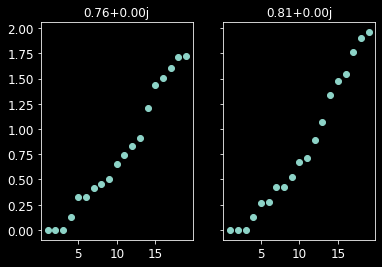

2022_03_28_02_52_50_gradual_stress_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


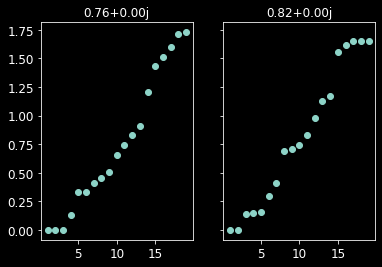

2022_03_28_09_03_02_gradual_stress_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


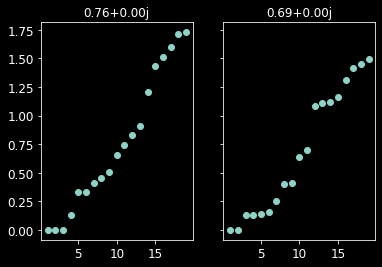

2022_03_29_17_08_00_gradual_stress_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


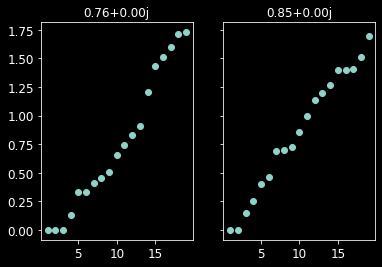

2022_03_29_19_05_48_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


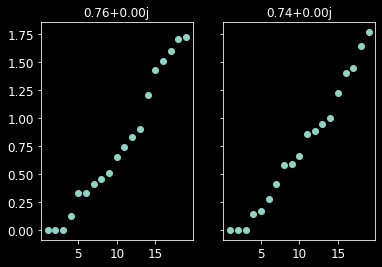

2022_03_29_22_04_42_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


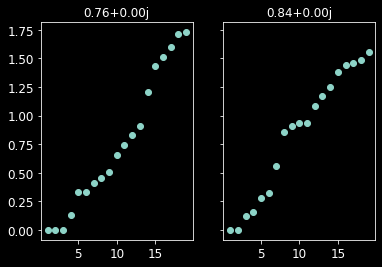

2022_03_29_23_18_11_gradual_stress_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


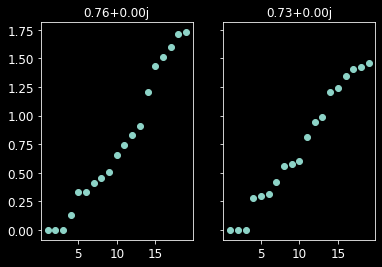

2022_03_30_00_36_01_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


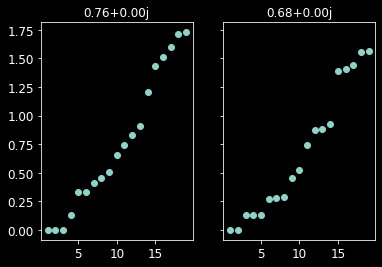

2022_03_30_03_32_59_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


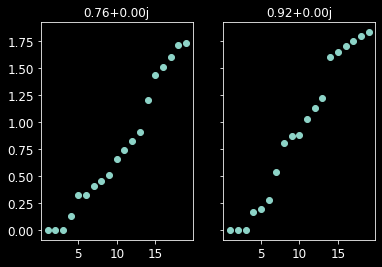

2022_03_30_05_28_12_gradual_stress_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


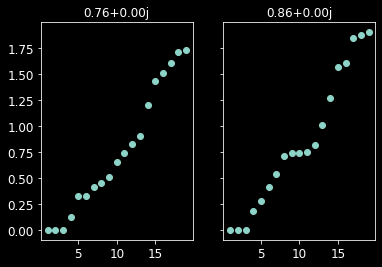

2022_03_30_06_03_56_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


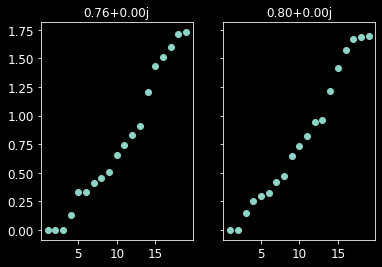

2022_03_30_09_00_05_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


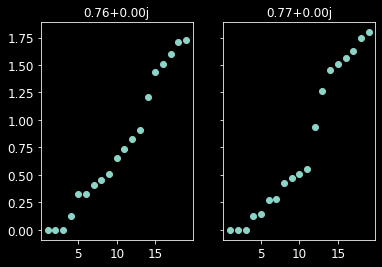

2022_03_30_10_44_04_gradual_stress_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


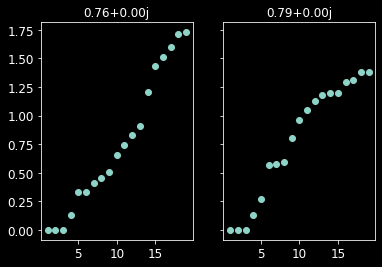

2022_03_30_11_31_13_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


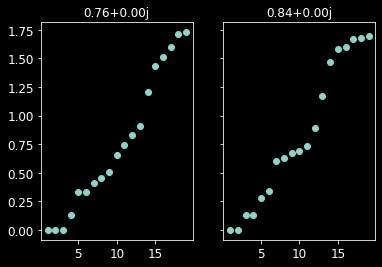

2022_03_30_14_27_38_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


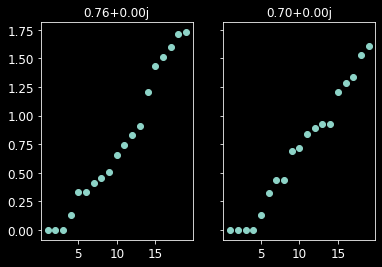

2022_03_30_16_55_30_gradual_stress_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


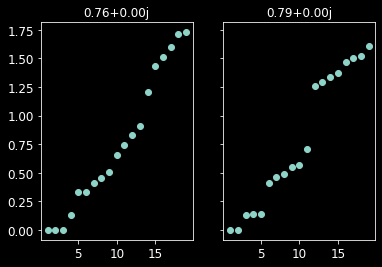

2022_03_30_16_58_53_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


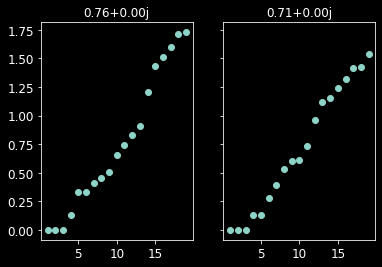

2022_03_30_19_57_07_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


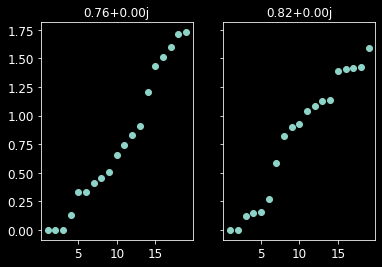

2022_03_30_22_11_10_gradual_stress_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


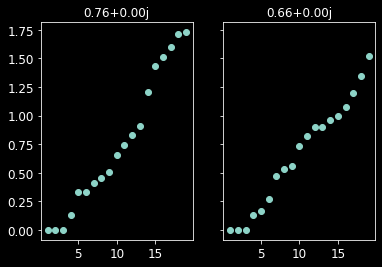

2022_03_30_22_27_49_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


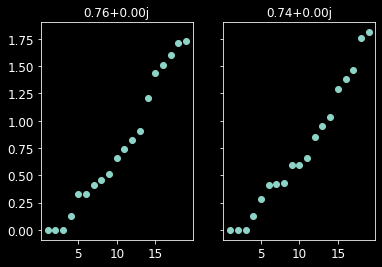

2022_03_31_01_23_56_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


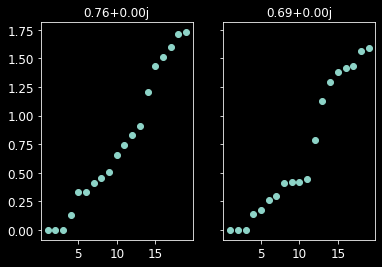

2022_03_31_03_54_17_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


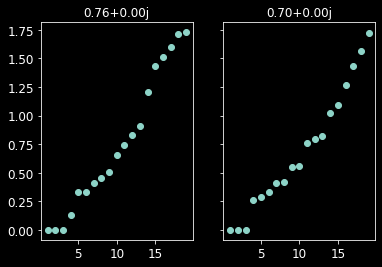

2022_03_31_04_21_04_gradual_stress_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


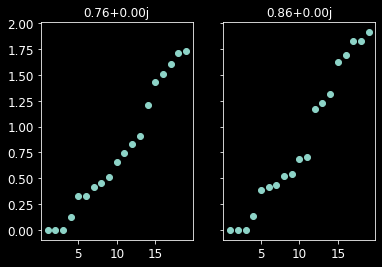

2022_03_31_06_50_01_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


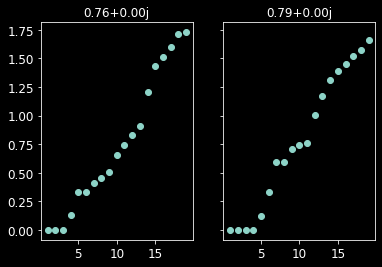

2022_03_31_09_20_02_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


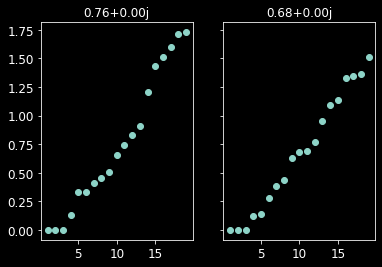

2022_03_31_09_36_37_gradual_stress_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


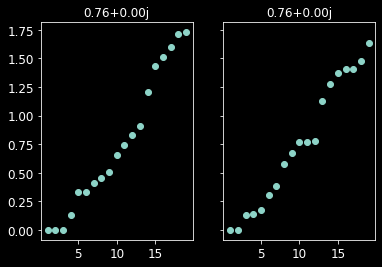

2022_03_31_12_15_46_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


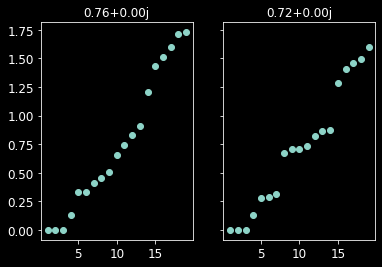

2022_03_31_15_46_40_gradual_stress_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


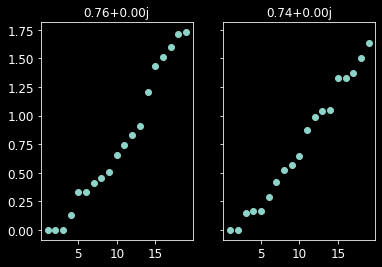

2022_03_31_21_02_23_gradual_stress_avg_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


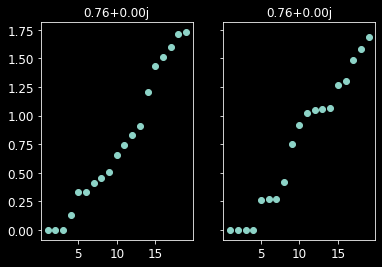

2022_04_01_03_12_16_gradual_stress_avg_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


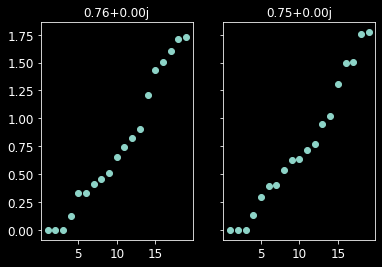

2022_04_01_08_27_44_gradual_stress_exp_growth_fitness_T_ws=[2000]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


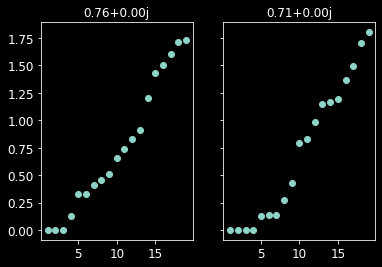

2022_04_01_14_37_45_gradual_stress_exp_growth_fitness_T_ws=[100]


C:\Users\Owner\Anaconda3\envs\GloopNetEvolution\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


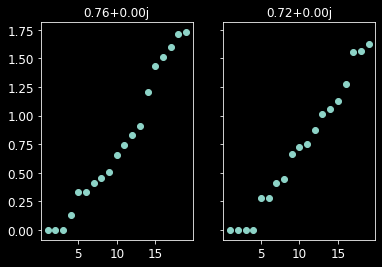

In [211]:
def gen_heat_map(exp_name):
    topology = np.load("topologies_and_Js\\topology_1.npy")[:, None]
    # sort_idx = np.argsort(topology)
    exp_dir = f"experiments\\EvoGloop\\{exp_name}"
    best_solutions = np.load(f"{exp_dir}\\best_solutions.npy")
    print(exp_name)
    first, last = best_solutions[0], best_solutions[-1]

    first, last = np.abs(first), np.abs(last)
    W = topology@(topology).T / max(topology)
    W = 1-W
    first, last = W*first, W*last
    # sparse_G = lambda A, p: A
    sparse_G = lambda A, p: np.where(A>np.percentile(A, p), A, 0)
    # sparse_G = lambda A, p: np.where((A>np.percentile(A, p)) | (A<np.percentile(A, 100-p)), A, 0)
    first, last = sparse_G(first, 90), sparse_G(last, 90)
    first_k_eigvals = lambda A, k: sorted(np.partition(np.linalg.eigvals(csgraph.laplacian(A, normed=False)), k))[1:k]
    with plt.style.context("dark_background"):
        fig, (ax_first, ax_last) = plt.subplots(1, 2, sharex=True, sharey=True)
    first_k_eigvals_first, first_k_eigvals_last = first_k_eigvals(first, 20), first_k_eigvals(last, 20)
    ax_first.scatter(np.arange(1, 20), first_k_eigvals_first)
    ax_first.set_title(f"{np.mean(first_k_eigvals_first):.2f}")
    ax_last.scatter(np.arange(1, 20), first_k_eigvals_last)
    ax_last.set_title(f"{np.mean(first_k_eigvals_last):.2f}")
    plt.show()

    # corr, p = pearsonr(np.mean(first, axis=0), topology)
    # print("first")
    # print(f"ingoing {corr:.2f}, {p:.3f}")
    # corr, p = pearsonr(np.mean(first, axis=1), topology)
    # print(f"outgoing {corr:.2f}, {p:.3f}")
    #
    # print("last")
    # corr, p = pearsonr(np.mean(last, axis=0), topology)
    # print(f"ingoing {corr:.2f}, {p:.3f}")
    # corr, p = pearsonr(np.mean(last, axis=1), topology)
    # print(f"outgoing {corr:.2f}, {p:.3f}")


    # first, last = first[np.ix_(sort_idx, sort_idx)], last[np.ix_(sort_idx, sort_idx)]
    # heat_map(first, title=f"Pre evolution {exp_name}", cmap="seismic", v=(-1, 1), path=None, mid_val=0)
    # heat_map(last, title=f"Post evolution {exp_name}", cmap="seismic", v=(-1, 1), path=None, mid_val=0)
    # with plt.style.context("dark_background"):
    #     fig, (ax_first, ax_last) = plt.subplots(1, 2, figsize=(18, 14))
    # ax_first.imshow(first)
    # ax_last.imshow(last)
    # plt.show()

for i, exp_name in enumerate(os.listdir(f"experiments\\EvoGloop")):
    gen_heat_map(exp_name)
    # break

In [160]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
   Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
   e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
   """

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

def heat_map(L, title, cmap="seismic", v=(-1, 1), path=None, mid_val=0):
    # figsize=(8.67, 11.69) (PDF)
    fig, ax = plt.subplots(1, 1, figsize=(12.8, 9.6), facecolor="beige")

    # ax.grid(True)
    # ax.set_xticks(np.linspace(0, 1, 100))
    # ax.set_yticks(np.linspace(0, 1, 100))

    # norm = colors.LogNorm()
    cmap_obj = plt.cm.get_cmap(cmap)
    cmap_obj.set_bad(color='black')
    if mid_val is None:
        im = ax.imshow(L, cmap=cmap_obj, origin='lower', extent=[0, 1, 0, 1], vmin=v[0], vmax=v[1], norm=None)
    else:
        elev_min = L.min()
        elev_max = L.max()
        mid_val = 0
        im = ax.imshow(L, cmap=cmap_obj, origin='lower', extent=[0, 1, 0, 1],
                       clim=(elev_min, elev_max),
                       norm=MidpointNormalize(midpoint=mid_val, vmin=elev_min, vmax=elev_max))

    # ax.set_ylabel(r'$k$')
    # ax.set_xlabel(r'$\tau_{0}$')
    # ax.tick_params(axis='both', which='both', bottom=False, top=False,
    #                 labelbottom=False, right=False, left=False,
    #                 labelleft=False)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)  # TODO
    # plt.colorbar(im, cax=cax, ticks=[])
    fig.suptitle(title, fontsize=16)

    # plt.show() if path is None else plt.savefig(path, dpi=config.DEFAULT_DPI, facecolor=fig.get_facecolor(), edgecolor='none')

In [ ]:
sparse_G = lambda A, p: np.where(A>np.percentile(A, p), A, 0)
first_k_eigvals = lambda A, k: sorted(np.partition(np.linalg.eigvals(csgraph.laplacian(A, normed=False)), k))[1:k]
for _ in range(10):
    n = 300
    G = np.random.normal(0, 3, size=(n**2)).reshape(n, n)
    G = sparse_G(G, 90)
    print(np.mean(first_k_eigvals(G, 20)))

In [ ]:
gamma = 1.5
get_best_solution = lambda exp_name: np.load(f"experiments\\EvoGloop\\{exp_name}\\best_solutions.npy")[-1]
get_random_solution = lambda: create_J_C(J_C=None, same_J_C=False, J_C_sigma=gamma / np.sqrt(len(topology)),
                  n_realizations=1, topology=topology)[0]

exp_names = list(os.listdir(f"experiments\\EvoGloop"))

best_solutions = \
    {
        ("avg", 100): [],
        ("avg", 2000): [],
        ("exp_growth", 100): [],
        ("exp_growth", 2000): []
    }
for exp_name in exp_names:
    arg_1 = ["avg", "exp_growth"]["exp_growth" in exp_name]
    arg_2 = [100, 2000]["2000" in exp_name]
    best_solutions[(arg_1, arg_2)] += [get_best_solution(exp_name)]

In [59]:
n_loops = 345
topology, J = np.load("topologies_and_Js\\topology_1.npy"), np.load("topologies_and_Js\\topology_1_J_1.npy")
n_realizations_per_J = 50  # On which to compute mean
n_spins = 2**14
spins_p = 0.5
sim_lens = [util.STABLE_T[1] + T_w + util.RELAXATION_TIME for T_w in T_ws]
Hs = [np.zeros(shape=(sim_len, len(topology))) for sim_len in sim_lens]

def get_rec_solution(sol_1, sol_2, recombination_idx):
    rv = (sol_1 + sol_2) / 2
    first_half_idx, second_half_idx = np.arange(0, recombination_idx), np.arange(0, recombination_idx)
    minor_1_idx, minor_2_idx = np.ix_(first_half_idx, first_half_idx), np.ix_(second_half_idx, second_half_idx)
    rv[minor_1_idx] = sol_1[minor_1_idx]
    rv[minor_2_idx] = sol_2[minor_2_idx]
    return rv

# best_solutions_fitness_results = {}
# random_J_fitness_results = {}

rec_J_fitness_results = {}

for fitness_f_type_str_1, T_ws_1 in product(["avg", "exp_growth"], [2000, 100]):
    for fitness_f_type_str_2, T_ws_2 in product(["avg", "exp_growth"], [2000, 100]):
        for fitness_f_type_str_test, T_ws_test in product(["avg", "exp_growth"], [2000, 100]):
            rec_J_fitness_results[(fitness_f_type_str_1, T_ws_1, fitness_f_type_str_2, T_ws_2, fitness_f_type_str_test, T_ws_test)] = []
            for _ in range(5):
                sol_1 = random.choice(best_solutions[(fitness_f_type_str_1, T_ws_1)])
                sol_2 = random.choice(best_solutions[(fitness_f_type_str_2, T_ws_2)])
                sol = get_rec_solution(sol_1, sol_2, np.random.choice(n_loops))
                fitness_f = {"avg": MulRunsAvgReturnTimeFitness, "exp_growth": MulExpGrowthFromReturnFitness}[fitness_f_type_str_test]\
                    (topology=topology, n_realizations_per_J=n_realizations_per_J, T_ws=[T_ws_test], sim_lens=sim_lens, Hs=Hs, spins_p=spins_p, n_spins=n_spins)
                rec_J_fitness_results[(fitness_f_type_str_1, T_ws_1, fitness_f_type_str_2, T_ws_2, fitness_f_type_str_test, T_ws_test)] +=\
                    [fitness_f(sol[None, ...])[0]]



# for exp_name, fitness_f_type_str, T_ws in product(exp_names, ["avg", "exp_growth"], [[2000], [100]]):
#     fitness_f = {"avg": MulRunsAvgReturnTimeFitness, "exp_growth": MulExpGrowthFromReturnFitness}[fitness_f_type_str]\
#         (topology=topology, n_realizations_per_J=n_realizations_per_J, T_ws=T_ws, sim_lens=sim_lens, Hs=Hs, spins_p=spins_p, n_spins=n_spins)
#     # best_solutions_fitness_results[f"{exp_name}_{fitness_f_type_str}_{T_ws}"] = fitness_f(get_best_solution(exp_name)[None, ...])
#     # random_J_fitness_results[f"{exp_name}_{fitness_f_type_str}_{T_ws}"] = fitness_f(get_random_solution()[None, ...])
#     rec_J_fitness_results[f"{exp_name}_{fitness_f_type_str}_{T_ws}"] = fitness_f(get_random_solution()[None, ...])


In [115]:
rec_J_fitness_results_avg = {k: rec_J_fitness_results[k] for k in rec_J_fitness_results.keys() if k[4]=="avg"}
rec_J_fitness_results_exp_growth = {k: rec_J_fitness_results[k] for k in rec_J_fitness_results.keys() if k[4]=="exp_growth"}

In [141]:
exp_l = lambda s: "exp" if s=="exp_growth" else s
t_to_str = lambda t: f"{exp_l(t[0])}_{t[1]}\n{exp_l(t[2])}_{t[3]}\n{exp_l(t[4])}_{t[5]}"
xtick_labels = ["Random", "Best"] + [t_to_str(t) for t in rec_J_fitness_results_avg.keys()]
xtick_labels

['Random',
 'Best',
 'avg_2000\navg_2000\navg_2000',
 'avg_2000\navg_2000\navg_100',
 'avg_2000\navg_100\navg_2000',
 'avg_2000\navg_100\navg_100',
 'avg_2000\nexp_2000\navg_2000',
 'avg_2000\nexp_2000\navg_100',
 'avg_2000\nexp_100\navg_2000',
 'avg_2000\nexp_100\navg_100',
 'avg_100\navg_2000\navg_2000',
 'avg_100\navg_2000\navg_100',
 'avg_100\navg_100\navg_2000',
 'avg_100\navg_100\navg_100',
 'avg_100\nexp_2000\navg_2000',
 'avg_100\nexp_2000\navg_100',
 'avg_100\nexp_100\navg_2000',
 'avg_100\nexp_100\navg_100',
 'exp_2000\navg_2000\navg_2000',
 'exp_2000\navg_2000\navg_100',
 'exp_2000\navg_100\navg_2000',
 'exp_2000\navg_100\navg_100',
 'exp_2000\nexp_2000\navg_2000',
 'exp_2000\nexp_2000\navg_100',
 'exp_2000\nexp_100\navg_2000',
 'exp_2000\nexp_100\navg_100',
 'exp_100\navg_2000\navg_2000',
 'exp_100\navg_2000\navg_100',
 'exp_100\navg_100\navg_2000',
 'exp_100\navg_100\navg_100',
 'exp_100\nexp_2000\navg_2000',
 'exp_100\nexp_2000\navg_100',
 'exp_100\nexp_100\navg_2000',
 '

In [184]:
T = 1000
# best_solutions_fitness_results_values = np.array([x[0] for x in best_solutions_fitness_results.values()])
# random_J_fitness_results_values = np.array([x[0] for x in random_J_fitness_results.values()])

def box_plot(ax, data, edge_color, fill_color, alpha=1):
    bp = ax.boxplot(data, patch_artist=True, showfliers=False)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, alpha=alpha)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color, alpha=alpha)
    return bp

In [179]:
with plt.style.context("dark_background"):
    fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(32, 14))

bp1 = box_plot(ax_1, [random_J_fitness_results_values[random_J_fitness_results_values<T],
                      best_solutions_fitness_results_values[best_solutions_fitness_results_values<T]] + list(rec_J_fitness_results_avg.values())
               , 'red', 'tan')

bp2 = box_plot(ax_2, [random_J_fitness_results_values[random_J_fitness_results_values>T],
                      best_solutions_fitness_results_values[best_solutions_fitness_results_values>T]] + list(rec_J_fitness_results_exp_growth.values())
               , 'blue', 'tan')
ax_1.set_xticks(range(1, 35), xtick_labels)
ax_2.set_xticks(range(1, 35), xtick_labels)
ax_1.set_title("Average growth fitness")
ax_2.set_title("Exponential growth fitness")
fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
fig.suptitle("Recombinant RCCN performance", fontsize=25, c="c")
util.save_fig("recombinant_RCCN_performance", facecolor="k")

# random_J_fitness_results_values
# rec_J_fitness_results_values

fig saved to C:\Users\OWNER\PycharmProjects\GloopNetEvolution\figure_dump\recombinant_RCCN_performance.png


In [ ]:
n_realizations_per_J_vals = [10, 50, 100, 200, 500, 1000]
def analyze_n_realizations_to_compute_fitness(J, test_fitness_f_type_str, test_T_ws):
    results = {k: [] for k in n_realizations_per_J_vals}
    for n_realizations_per_J in n_realizations_per_J_vals:
        for _ in range(20):
            fitness_f = {"avg": MulRunsAvgReturnTimeFitness, "exp_growth": MulExpGrowthFromReturnFitness}[test_fitness_f_type_str]\
                (topology=topology, n_realizations_per_J=n_realizations_per_J, T_ws=test_T_ws, sim_lens=sim_lens, Hs=Hs, spins_p=spins_p, n_spins=n_spins)
            results[n_realizations_per_J] += [fitness_f(J[None, ...])[0]]
    return results


# for exp_name, fitness_f_type_str, T_ws in product(exp_names, ["avg", "exp_growth"], [[2000], [100]]):
random_J_analysis_results = \
    {
        ("avg", 100): [],
        ("avg", 2000): [],
        ("exp_growth", 100): [],
        ("exp_growth", 2000): []
    }
best_J_analysis_results = \
    {
        ("avg", 100): [],
        ("avg", 2000): [],
        ("exp_growth", 100): [],
        ("exp_growth", 2000): []
    }

for fitness_f_type_str, T_ws in product(["avg", "exp_growth"], [[2000], [100]]):
    for i in range(5):
        best_J_analysis_results[(fitness_f_type_str, T_ws[0])] += [analyze_n_realizations_to_compute_fitness(best_solutions[(fitness_f_type_str, T_ws[0])][i], fitness_f_type_str, T_ws)]
    for _ in range(5):
        random_J_analysis_results[(fitness_f_type_str, T_ws[0])] += [analyze_n_realizations_to_compute_fitness(get_random_solution(), fitness_f_type_str, T_ws)]

In [170]:
flatten_list = lambda l: [x[0] for x in l]
flatten_dict = lambda d: {k: flatten_list(d[k]) for k in d.keys()}

In [ ]:
with plt.style.context("dark_background"):
    fig, axes = plt.subplots(4, 5, figsize=(24, 14), sharey="row")


for i, (fitness_f_type_str, T_ws) in enumerate(product(["avg", "exp_growth"], [[2000], [100]])):
# for i, (fitness_f_type_str, T_ws) in enumerate(product(["exp_growth"], [[2000], [100]])):
    for j in range(5):
        axes[i, j].set_title(f"{fitness_f_type_str} fitness\nT_w = {T_ws[0]}")
        bp1 = box_plot(axes[i, j], random_J_analysis_results[(fitness_f_type_str, T_ws[0])][j].values()
                   , 'red', 'tan', alpha=0.5)
        axes[i, j].set_xticks(range(1, len(n_realizations_per_J_vals) + 1), n_realizations_per_J_vals)

fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
fig.suptitle("Effect of n_realizations on fitness estimation", fontsize=25, c="c")
# plt.show()
util.save_fig("effect_of_n_realizations_on_fitness_estimation", facecolor="k")

# random_J_analysis_results

In [265]:
def advance(N, mu, C):
    return N*np.exp(mu*(1 - np.sum(N)/C))

mu = 1 / 50
C = 10_000

N = np.zeros(shape=(T, 3))
N[0, :] = np.array([1, 3, 5])

for t in range(T - 1):
    N[t + 1, :] = advance(N[t, :], mu=mu, C=C)

N_0 = np.sum(N[0, :])
t = np.arange(T)
logistic_N = C*N_0*np.exp(mu*t) / (C + N_0*(np.exp(mu*t) - 1))

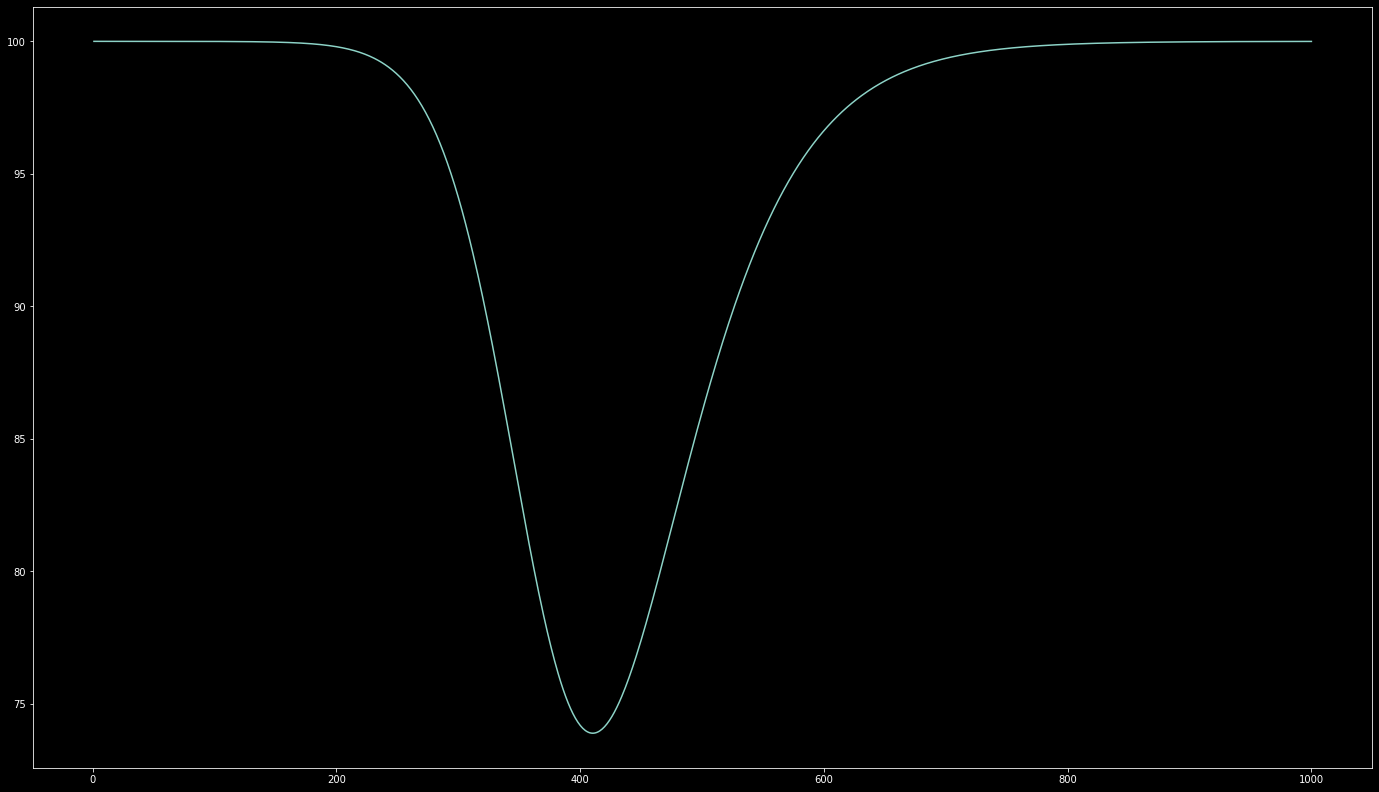

In [270]:
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(1, 1, figsize=(24, 14))
# ax.axhline(y=C, c="g")
# ax.plot(np.arange(T) + 1, N)
# ax.plot(np.arange(T) + 1, np.sum(N, axis=1))
# ax.plot(np.arange(T) + 1, logistic_N)
ax.plot(np.arange(T) + 1, logistic_N - np.sum(N, axis=1) + 100)

In [ ]:
N = 20000
lam = 0.05

a = np.random.binomial(n=N, p=lam, size=10000)
b = np.random.poisson(N*lam, size=10000)
with plt.style.context("dark_background"):
    fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(24, 14), sharex=True)
l = max(np.max(a), np.max(b))
ax_1.hist(a, bins=l)
ax_2.hist(b, bins=l)
plt.show()

,0,1
0,[0. 0. 0. 0. 0. ...,[ 1. 1.6478971 2.7146854 4.46968...
1,NaN,[ 1. 1.6478971 2.7146854 5.46968...
2,NaN,[ 1. 1.6478971 2.7146854 4.46968...
3,NaN,[ 1. 1.6478971 2.7146854 4.46968...
4,NaN,[ 1. 1.6478971 3.7146854 6.11311...


In [7]:
import altair as alt
import pandas as pd

data = pd.read_csv("tst")
url = 'data.json'
data.to_json(url, orient='records')

alt.Chart(url).mark_area().encode(
    alt.X('Time:T'),
    alt.Y('Count:Q', stack='center'),
    alt.Color('ID:N')
).interactive(bind_y=False)


alt.Chart(...)

In [19]:
import torch

def rewind_FC(FC_idx, top_low, top_high):
    FC_idx -= 1
    low_idx = FC_idx < top_low
    FC_idx[low_idx] = top_high[low_idx]

def rewind_FC_(cs, FC_idx, topology):
    FC_idx -= cs
    FC_idx -= 1
    FC_idx = FC_idx%topology
    FC_idx += cs
    return FC_idx


topology = torch.tensor([4, 3, 1, 2])
C_idx = torch.tensor([0, 4, 7, 8])
FC_idx = torch.tensor([3, 6, 7, 9])
top_low = C_idx.clone()
top_high = FC_idx.clone()
cs = torch.zeros(len(topology), dtype=torch.long)
cs[1:] = torch.cumsum(topology, dim=0)[:-1]
print(cs)

for i in range(10):
    print(f"{FC_idx=}")
    # rewind_FC(FC_idx, top_low, top_high)
    FC_idx = rewind_FC_(cs, FC_idx, topology)

tensor([0, 4, 7, 8])
FC_idx=tensor([3, 6, 7, 9])
FC_idx=tensor([2, 2, 0, 0])
FC_idx=tensor([1, 1, 0, 1])
FC_idx=tensor([0, 0, 0, 0])
FC_idx=tensor([3, 2, 0, 1])
FC_idx=tensor([2, 1, 0, 0])
FC_idx=tensor([1, 0, 0, 1])
FC_idx=tensor([0, 2, 0, 0])
FC_idx=tensor([3, 1, 0, 1])
FC_idx=tensor([2, 0, 0, 0])
